In [2]:
class System:
    def __init__(self, T_init, T_final, volume, r, t_end, T_env, t_0, dt):
        self.T_init = T_init
        self.T_final = T_final
        self.volume = volume
        self.r = r
        self.t_end = t_end
        self.T_env = T_env
        self.t_0 = t_0
        self.dt = dt

def make_system(T_init, volume, r, t_end):
    return System(T_init=T_init,
                  T_final=T_init,
                  volume=volume,
                  r=r,
                  t_end=t_end,
                  T_env=22,
                  t_0=0,
                  dt=1)

coffee = make_system(T_init=90, volume=300, r=0.01, t_end=30)

def change_func(t, T, system):
    r, T_env, dt = system.r, system.T_env, system.dt    
    return -r * (T - T_env) * dt

result = change_func(0, coffee.T_init, coffee)
print(result)


-0.68


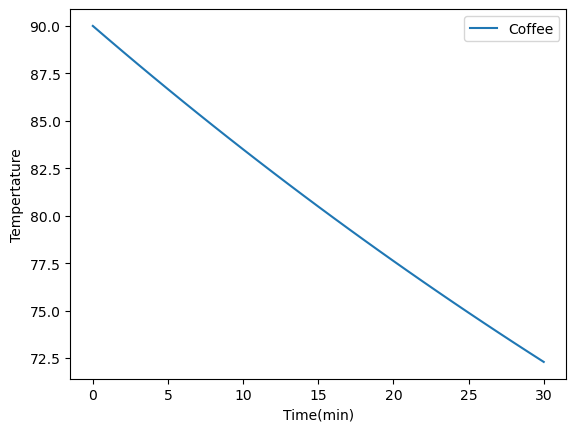

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined System, make_system, and change_func as before

def run_simulation(system, change_func):
    t_array = np.arange(system.t_0, system.t_end + system.dt, system.dt)
    n = len(t_array)
    
    series = pd.Series(index=t_array)
    series.iloc[0] = system.T_init
    
    for i in range(n-1):
        t = t_array[i]
        T = series.iloc[i]
        series.iloc[i+1] = T + change_func(t, T, system)
    
    system.T_final = series.iloc[-1]
    return series

results = run_simulation(coffee, change_func)

# Assuming you want to plot the results
plt.plot(results.index, results.values, label='Coffee')
plt.xlabel('Time(min)')
plt.ylabel('Tempertature')
plt.legend()
plt.show()

